In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pprint
import numpy as np
import pandas as pd
# from pathlib import Path

from matplotlib import pyplot as plt
# import seaborn as sns
# import scanpy as sc

# from sklearn.metrics import adjusted_rand_score
# from IPython.display import display, HTML

import warnings
from numba.core.errors import NumbaDeprecationWarning

# from calicost import arg_parse

In [3]:
from sim_analysis import (
    get_config,
    get_sampleid,
    get_best_r_hmrf,
    get_rdrbaf,
    get_gene_ranges_path,
    get_true_clones_path,
    get_true_clones,
    get_truth_cna_file,
    get_sim_runs,
    get_numbat_path,
    get_numbat_clones,
    get_calico_best_clones_path,
    get_r_hmrf_likelihoods,
    get_starch_clones,
    plot_clones,
    get_calico_best_clones,
    get_cna_seglevel,
    read_gene_ranges,
    read_true_gene_cna,
    read_calico_gene_cna,
    read_numbat_gene_cna,
    read_starch_gene_cna,
    compute_gene_F1,
    get_clone_aris, 
    plot_aris,
    get_f1s,
    plot_f1s,
    plot_rdr_baf
)

## Configuration

In [4]:
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)

In [5]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 40)
pd.set_option('display.max_columns', 20)

plt.rcParams.update({'font.size': 14})
# sc.set_figure_params(dpi=120)

In [6]:
true_dir = "../simulated_data_related"
calico_pure_dir = "../nomixing_calicost_related"
numbat_dir = "../numbat_related"
starch_dir = "../starch_related"

calico_repo_dir = "/Users/mw9568/Work/ragr/CalicoST/"

In [7]:
gene_ranges = read_gene_ranges(calico_repo_dir)
gene_ranges

chr     start       end
gene                               
FAM138A       1     34554     36081
OR4F5         1     65419     71585
AL627309.1    1     89295    133723
AL627309.3    1     89551     91105
AL627309.2    1    139790    140339
...         ...       ...       ...
SHANK3       22  50674415  50733298
AC000036.1   22  50735825  50738139
ACR          22  50738196  50745339
AC002056.2   22  50740593  50743520
RABL2B       22  50767501  50783663

[35299 rows x 3 columns]

## Preface

Note:
 - min. 100 spots per clone
 - assumes (max.) of 3 clones

### Available Runs

In [8]:
sim_runs = get_sim_runs()
sim_runs

n_cnas cna_size  ploidy  random                               sampleid
0   (1, 2)      1e7       2       0  numcnas1.2_cnasize1e7_ploidy2_random0
1   (1, 2)      1e7       2       1  numcnas1.2_cnasize1e7_ploidy2_random1
2   (1, 2)      1e7       2       2  numcnas1.2_cnasize1e7_ploidy2_random2
3   (1, 2)      1e7       2       3  numcnas1.2_cnasize1e7_ploidy2_random3
4   (1, 2)      1e7       2       4  numcnas1.2_cnasize1e7_ploidy2_random4
..     ...      ...     ...     ...                                    ...
85  (6, 3)      5e7       2       5  numcnas6.3_cnasize5e7_ploidy2_random5
86  (6, 3)      5e7       2       6  numcnas6.3_cnasize5e7_ploidy2_random6
87  (6, 3)      5e7       2       7  numcnas6.3_cnasize5e7_ploidy2_random7
88  (6, 3)      5e7       2       8  numcnas6.3_cnasize5e7_ploidy2_random8
89  (6, 3)      5e7       2       9  numcnas6.3_cnasize5e7_ploidy2_random9

[90 rows x 5 columns]

### Config for a given run

In [9]:
# sim_id = {2: numbat clones plot}.
sim_id = 0

# NB [(1, 2), "1e7", 2, random], [(3, 3), "3e7", 2, random]
run = sim_runs[["n_cnas", "cna_size", "ploidy", "random"]].iloc[sim_id].values

config = get_config(calico_pure_dir, *run, verbose=True)

Reading configuration file: ../nomixing_calicost_related/numcnas1.2_cnasize1e7_ploidy2_random0/configfile0
  snp_dir: /u/congma/ragr-data/users/congma/Datasets/CalicoST_simulation/simulated_data_related/numcnas1.2_cnasize1e7_ploidy2_random0
  output_dir: /u/congma/ragr-data/users/congma/Datasets/CalicoST_simulation/nomixing_calicost_related/numcnas1.2_cnasize1e7_ploidy2_random0
  geneticmap_file: /u/congma/ragr-data/users/congma/Codes/CalicoST/resources/genetic_map_GRCh38_merged.tab
  hgtable_file: /u/congma/ragr-data/users/congma/Codes/STARCH_crazydev/hgTables_hg38_gencode.txt
  normalidx_file: None
  tumorprop_file: None
  supervision_clone_file: None
  filtergenelist_file: /n/fs/ragr-data/users/congma/references/cellranger_refdata-gex-GRCh38-2020-A/genes/ig_gene_list.txt
  filterregion_file: /n/fs/ragr-data/users/congma/references/cellranger_refdata-gex-GRCh38-2020-A/genes/HLA_regions.bed
  secondary_min_umi: 200
  min_snpumi_perspot: 50
  min_percent_expressed_spots: 0.005
  bafonl

In [10]:
df_clone = get_r_hmrf_likelihoods(calico_pure_dir, *run)
df_clone

random_seed  log_likelihood
0            0   -7.462320e+06
1            1   -7.462320e+06
2            2   -7.462320e+06
3            3   -7.462320e+06
4            4   -7.462320e+06
5            5   -7.462320e+06
6            6   -7.462320e+06
7            7   -7.462320e+06
8            8   -7.462320e+06
9            9   -7.462320e+06

In [11]:
true_clones = get_true_clones(true_dir, *run)
calico_clones = get_calico_best_clones(calico_pure_dir, *run, true_dir=true_dir)
starch_clones = get_starch_clones(starch_dir, *run, true_clones=true_clones)
numbat_clones = get_numbat_clones(numbat_dir, *run, true_clones=true_clones)
calico_clones

/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1066: UserWarning: 
../numbat_related/numcnas1.2_cnasize1e7_ploidy2_random0/outs/clone_post_2.tsv does not exist.
  warnings.warn(f"\n{numbat_path} does not exist.")


est_clone true_clone   x   y
spot                              
0             0          2   0   0
1             0          2   0   2
2             0          2   0   4
3             0          2   0   6
4             0          2   0   8
...         ...        ...  ..  ..
2995          1          0  99  51
2996          1          0  99  53
2997          1          0  99  55
2998          1          0  99  57
2999          1          0  99  59

[3000 rows x 4 columns]

/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:958: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.scatterplot(
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:958: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:958: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:934: UserWarning: No clones to plot.
  warnings.warn("No clones to plot.")


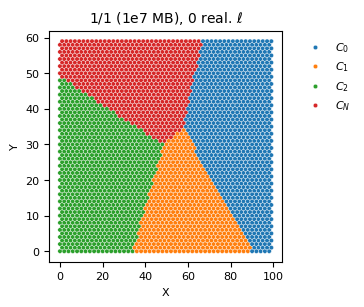

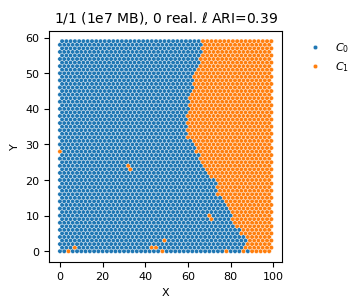

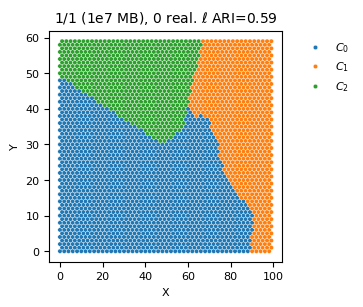

In [12]:
_ = plot_clones(true_clones, *run, truth=True)
_ = plot_clones(calico_clones, *run)
_ = plot_clones(starch_clones, *run)
_ = plot_clones(numbat_clones, *run)

In [13]:
cna_seglevel = get_cna_seglevel(
    calico_pure_dir,
    get_sampleid(*run),
    get_best_r_hmrf(calico_pure_dir, *run),
    ploidy="diploid",
    non_neutral_only=True,
)

print(cna_seglevel)

    chr      start        end  clone0 a  clone0 b  clone1 a  clone1 b  global_cna
0     1  244408494  244706178         1         1         3         3       False
1     1  244840638  245708918         1         1         3         3       False
2     7    5970925    6025028         1         1         3         3       False
3     7    6104884    6245114         1         1         3         3       False
4     7    6374527    6402530         1         1         3         3       False
5    10   71816298   72086584         3         3         1         1       False
6    11   67266473   67351059         1         1         3         3       False
7    12   57253762   62336404         1         1         0         2       False
8    12   62466817   62595903         1         1         0         2       False
9    12   62602752   64151353         1         1         0         2       False
10   12   64404392   64697535         1         1         0         2       False
11   12   647134

In [14]:
true_gene_cna = read_true_gene_cna(
    gene_ranges,
    get_truth_cna_file(true_dir, get_sampleid(*run)),
    non_neutral_only=True
)
true_gene_cna

chr      start        end  clone0 a  clone0 b clone0_gtype clone0_ctype  clone1 a  clone1 b clone1_gtype clone1_ctype  clone2 a  clone2 b clone2_gtype clone2_ctype  global_cna
0      5  102141893  102146874         1         1          1|1          NEU         1         1          1|1          NEU         2         1          2|1          AMP       False
1      5  102233986  102296284         1         1          1|1          NEU         1         1          1|1          NEU         2         1          2|1          AMP       False
2      5  102371774  102499016         1         1          1|1          NEU         1         1          1|1          NEU         2         1          2|1          AMP       False
3      5  102500541  102505670         1         1          1|1          NEU         1         1          1|1          NEU         2         1          2|1          AMP       False
4      5  102581368  102617589         1         1          1|1          NEU         1         1          1|1          NEU         2         1          2|1          AMP       False
..   ...        ...        ...       ...       ...          ...          ...       ...       ...          ...          ...       ...       ...          ...          ...         ...
784   20   61267525   61271827         0         1          0|1          DEL         0         1          0|1          DEL         0         1          0|1          DEL       False
785   20   61369879   61370855         0         1          0|1          DEL         0         1          0|1          DEL         0         1          0|1          DEL       False
786   20   61432868   61437630         0         1          0|1          DEL         0         1          0|1          DEL         0         1          0|1          DEL       False
787   20   61717506   61719748         0         1          0|1          DEL         0         1          0|1          DEL         0         1          0|1          DEL       False
788   20   61738219   61755056         0         1          0|1          DEL         0         1          0|1          DEL         0         1          0|1          DEL       False

[789 rows x 16 columns]

/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:365: RuntimeWarning: invalid value encountered in divide
  y=X[:, 0, c] / base_nb_mean[:, c],
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:365: RuntimeWarning: invalid value encountered in divide
  y=X[:, 0, c] / base_nb_mean[:, c],


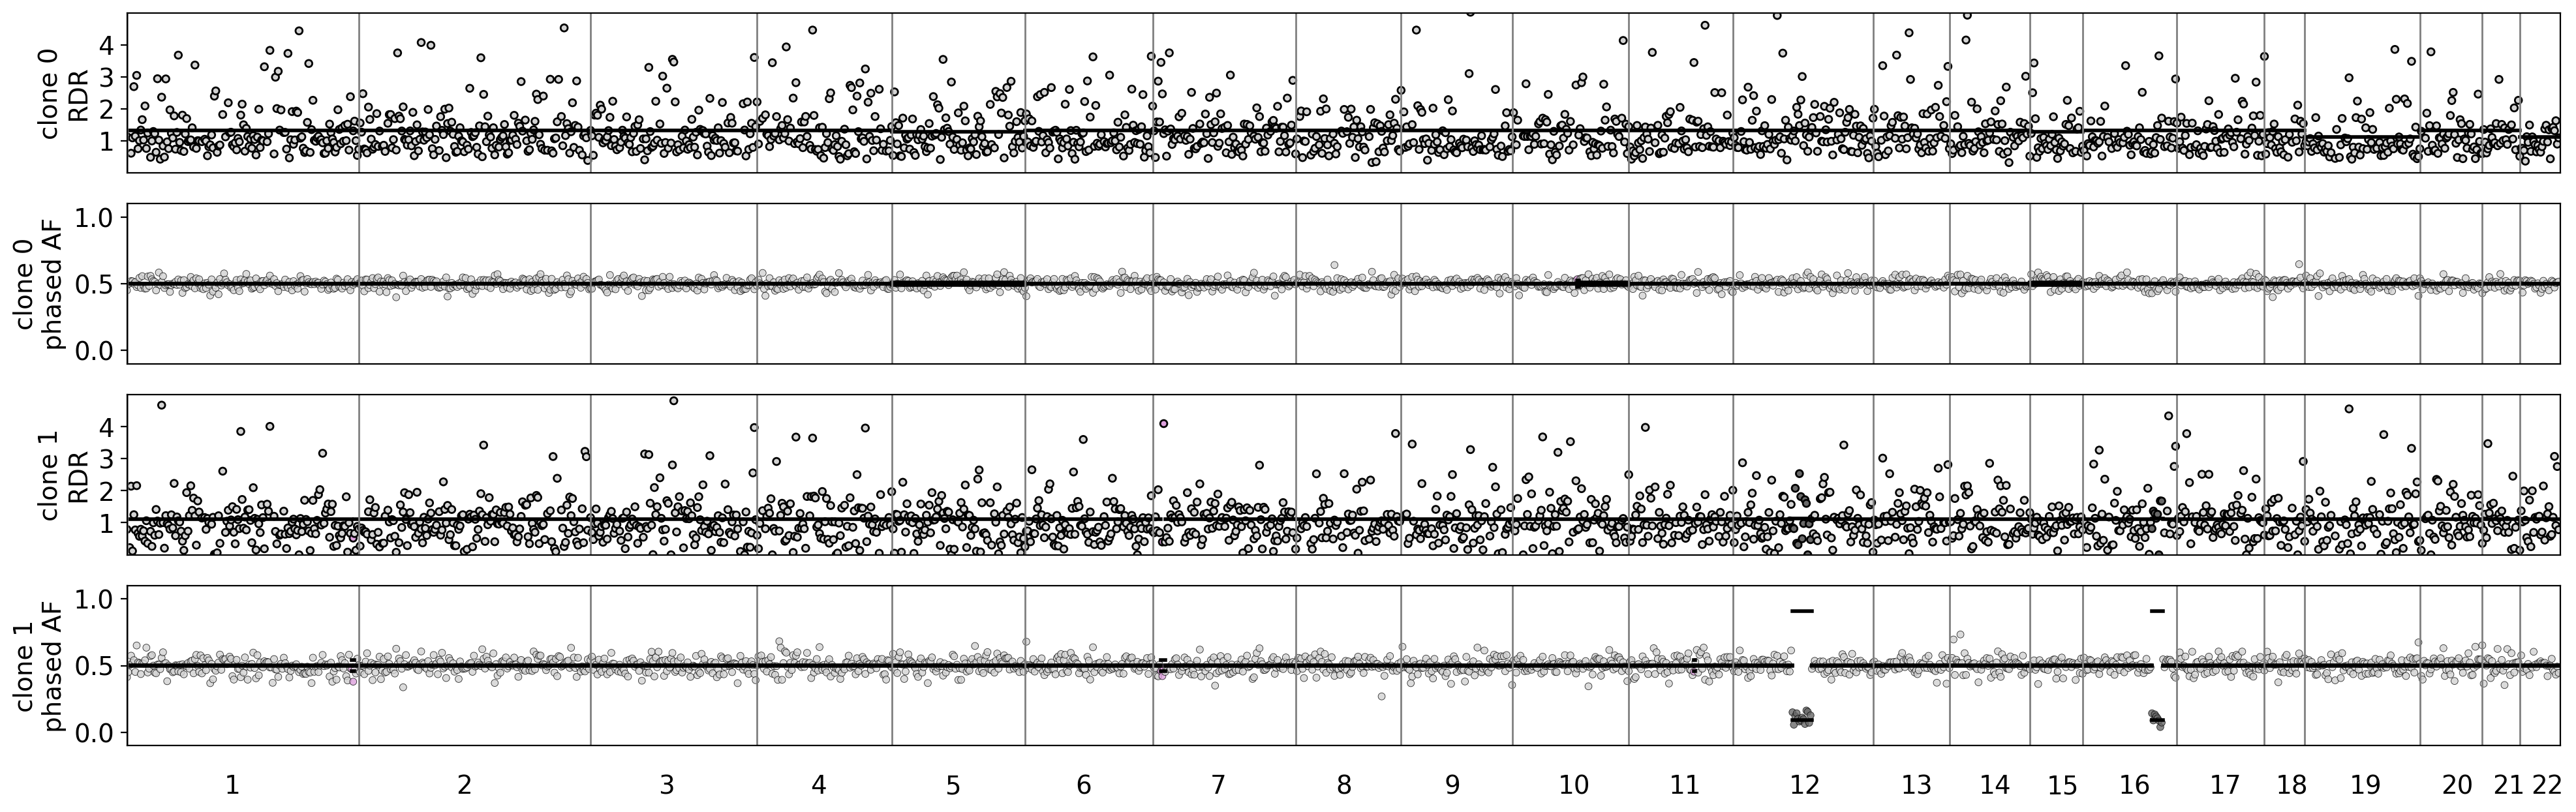

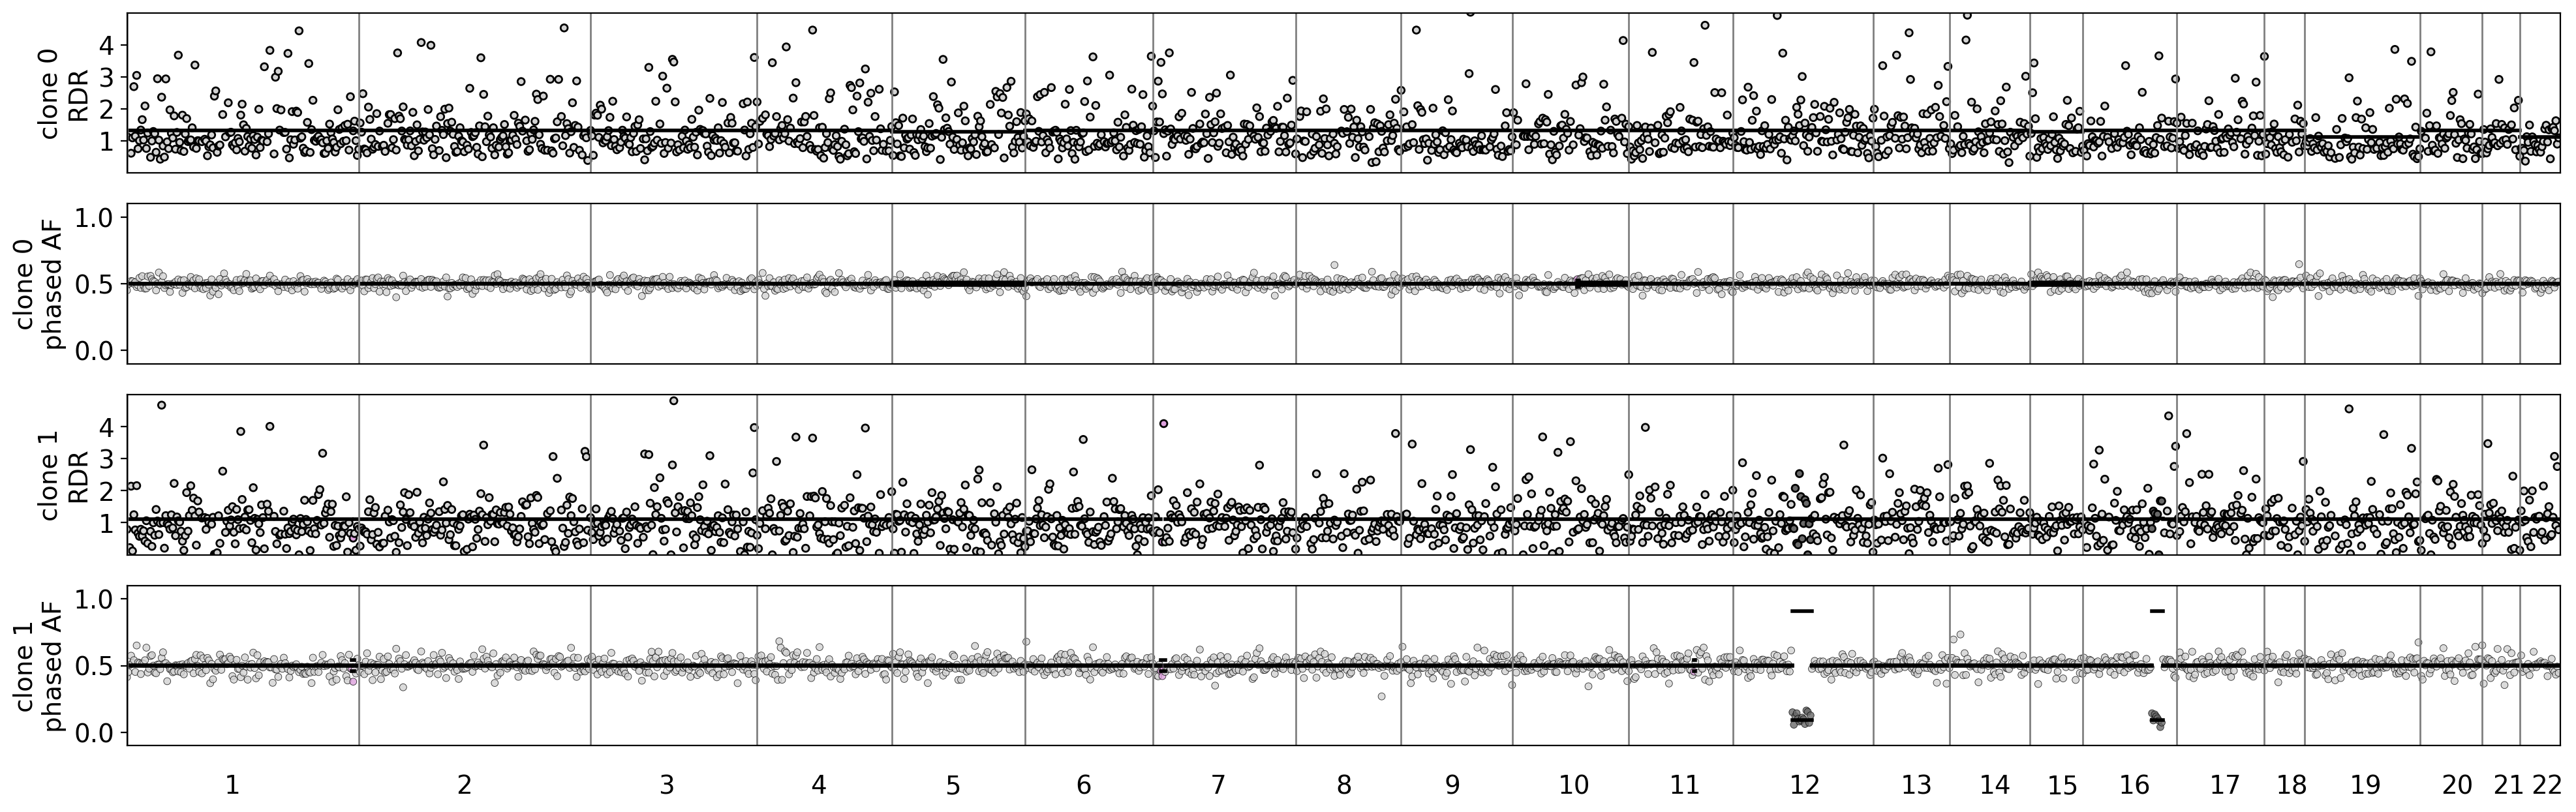

In [15]:
plot_rdr_baf(calico_pure_dir, *run)

# Clone identification accuracy

In [16]:
clone_aris = get_clone_aris(true_dir, calico_pure_dir, numbat_dir, starch_dir)
clone_aris

/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1066: UserWarning: 
../numbat_related/numcnas1.2_cnasize1e7_ploidy2_random0/outs/clone_post_2.tsv does not exist.
  warnings.warn(f"\n{numbat_path} does not exist.")
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1066: UserWarning: 
../numbat_related/numcnas1.2_cnasize1e7_ploidy2_random1/outs/clone_post_2.tsv does not exist.
  warnings.warn(f"\n{numbat_path} does not exist.")
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1066: UserWarning: 
../numbat_related/numcnas1.2_cnasize1e7_ploidy2_random4/outs/clone_post_2.tsv does not exist.
  warnings.warn(f"\n{numbat_path} does not exist.")
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:135: UserWarning: CalicoST RDR/BAF determinations do not exist for ../nomixing_calicost_related/numcnas1.2_cnasize1e7_ploidy2_random5/clone3_rectangle5_w1.0/rdrbaf_final_nstates7_smp.npz
  warnings.warn(f"CalicoST RDR/BAF determinations do not exist for {rdrbaf_path}")
/Use

cnas  n_cnas cna_size  ploidy  random                              sample_id                                   true_clones_path    method    recall       ari                                   best_clones_path
0    (1, 2)       3     10Mb       2       0  numcnas1.2_cnasize1e7_ploidy2_random0  ../simulated_data_related/numcnas1.2_cnasize1e...  CalicoST  0.981554  0.393603  ../nomixing_calicost_related/numcnas1.2_cnasiz...
1    (1, 2)       3     10Mb       2       0  numcnas1.2_cnasize1e7_ploidy2_random0  ../simulated_data_related/numcnas1.2_cnasize1e...    Numbat  0.000000  0.000000  ../numbat_related/numcnas1.2_cnasize1e7_ploidy...
2    (1, 2)       3     10Mb       2       0  numcnas1.2_cnasize1e7_ploidy2_random0  ../simulated_data_related/numcnas1.2_cnasize1e...    Starch  0.895988  0.585557  ../starch_related/numcnas1.2_cnasize1e7_ploidy...
3    (1, 2)       3     10Mb       2       1  numcnas1.2_cnasize1e7_ploidy2_random1  ../simulated_data_related/numcnas1.2_cnasize1e...  CalicoST  0.859591  0.213817  ../nomixing_calicost_related/numcnas1.2_cnasiz...
4    (1, 2)       3     10Mb       2       1  numcnas1.2_cnasize1e7_ploidy2_random1  ../simulated_data_related/numcnas1.2_cnasize1e...    Numbat  0.000000  0.000000  ../numbat_related/numcnas1.2_cnasize1e7_ploidy...
..      ...     ...      ...     ...     ...                                    ...                                                ...       ...       ...       ...                                                ...
218  (6, 3)       9     50Mb       2       7  numcnas6.3_cnasize5e7_ploidy2_random7  ../simulated_data_related/numcnas6.3_cnasize5e...    Starch  0.961439  0.673552  ../starch_related/numcnas6.3_cnasize5e7_ploidy...
219  (6, 3)       9     50Mb       2       8  numcnas6.3_cnasize5e7_ploidy2_random8  ../simulated_data_related/numcnas6.3_cnasize5e...    Numbat  0.505462  0.396501  ../numbat_related/numcnas6.3_cnasize5e7_ploidy...
220  (6, 3)       9     50Mb       2       8  numcnas6.3_cnasize5e7_ploidy2_random8  ../simulated_data_related/numcnas6.3_cnasize5e...    Starch  0.989957  0.911511  ../starch_related/numcnas6.3_cnasize5e7_ploidy...
221  (6, 3)       9     50Mb       2       9  numcnas6.3_cnasize5e7_ploidy2_random9  ../simulated_data_related/numcnas6.3_cnasize5e...    Numbat  0.879347  0.848603  ../numbat_related/numcnas6.3_cnasize5e7_ploidy...
222  (6, 3)       9     50Mb       2       9  numcnas6.3_cnasize5e7_ploidy2_random9  ../simulated_data_related/numcnas6.3_cnasize5e...    Starch  0.836786  0.169663  ../starch_related/numcnas6.3_cnasize5e7_ploidy...

[223 rows x 11 columns]

/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1250: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.boxplot(
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1262: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.stripplot(
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1250: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.boxplot(
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1262: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.stripplot(
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1250: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.boxplot(
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1262: UserWarning: The palette list has more values (10) than needed (3), 

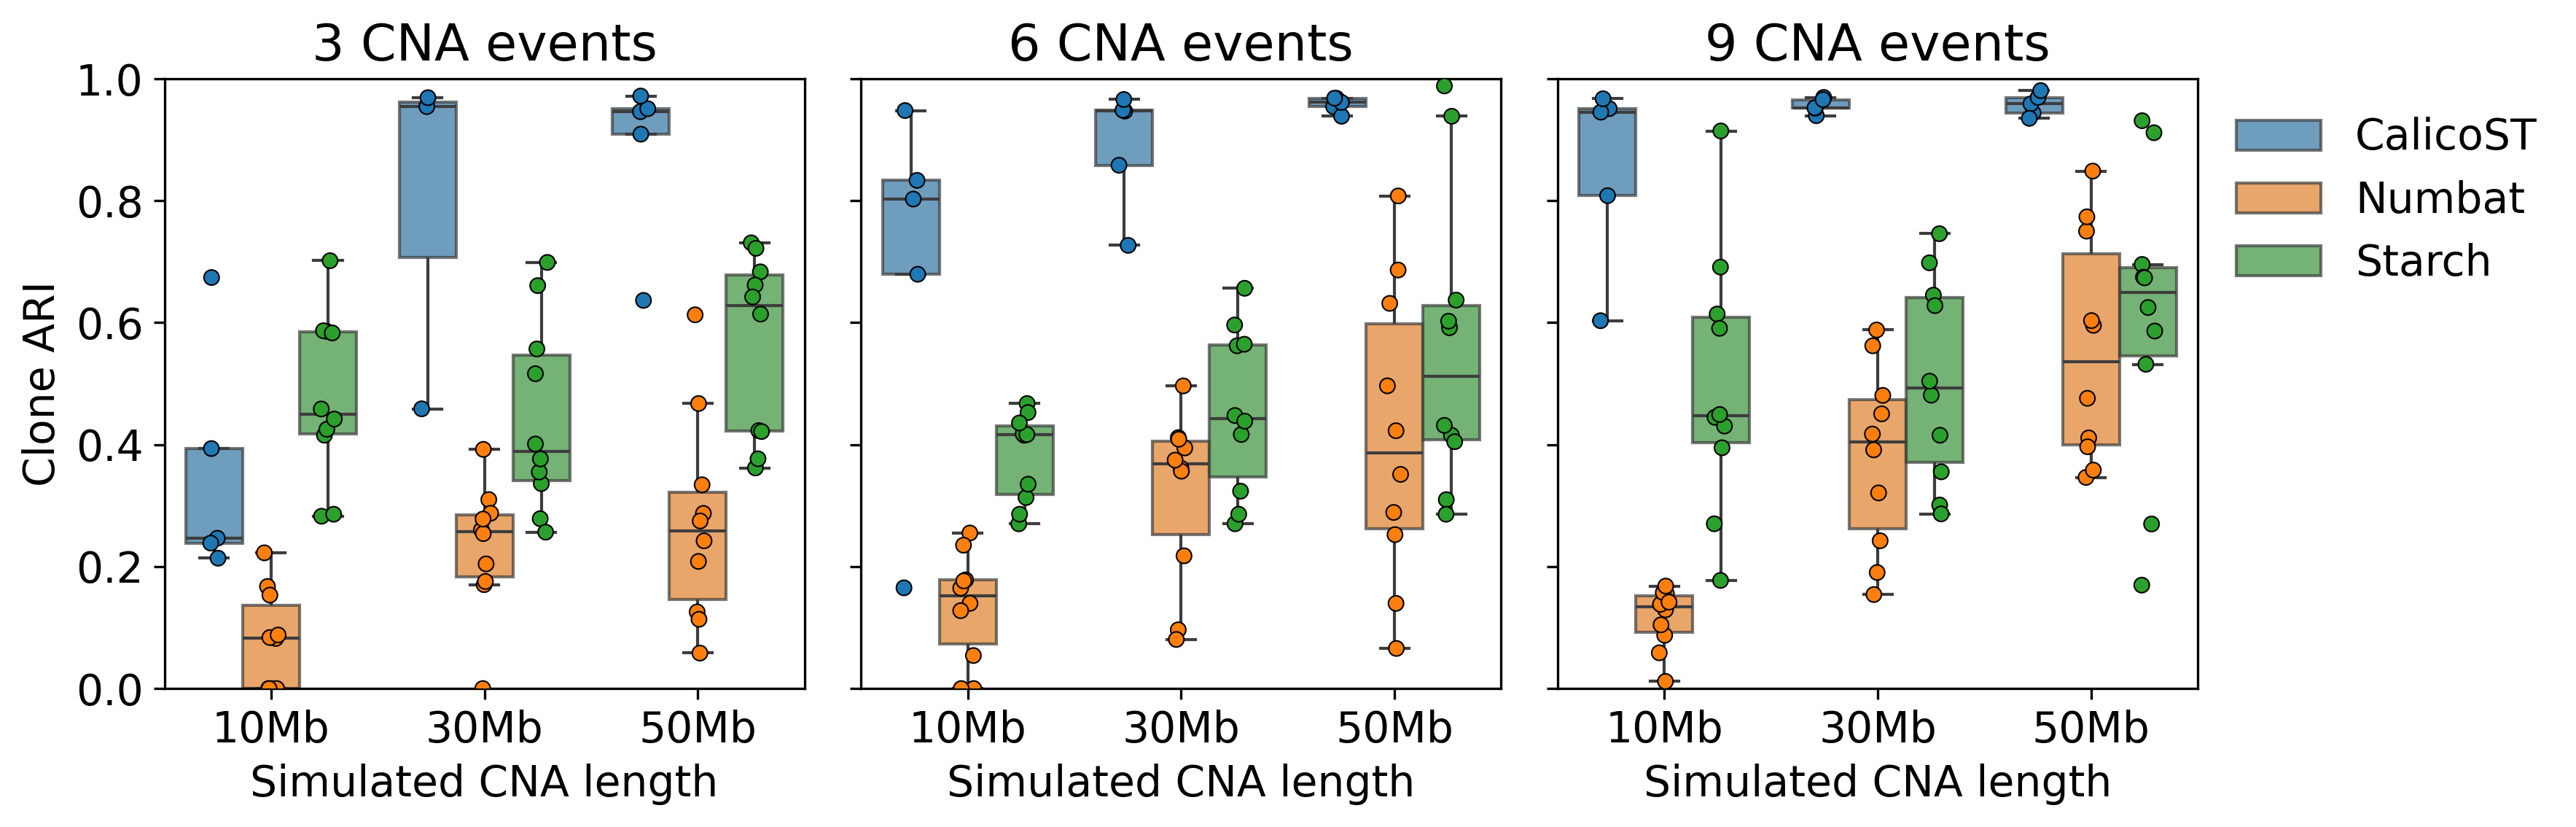

In [17]:
plot_aris(clone_aris)

# Event detection accuracy

The detection accuracy is evalated on a per-gene level:
the precision & sensitivity of genes involved in each category of event (Deletion, Amplication, LOH) for all events.

In [18]:
f1s = get_f1s(calico_repo_dir, true_dir, calico_pure_dir, numbat_dir, starch_dir)
f1s

/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:135: UserWarning: CalicoST RDR/BAF determinations do not exist for ../nomixing_calicost_related/numcnas1.2_cnasize1e7_ploidy2_random5/clone3_rectangle5_w1.0/rdrbaf_final_nstates7_smp.npz
  warnings.warn(f"CalicoST RDR/BAF determinations do not exist for {rdrbaf_path}")
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:177: UserWarning: ../nomixing_calicost_related/numcnas1.2_cnasize1e7_ploidy2_random5/clone3_rectangle5_w1.0/rdrbaf_final_nstates7_smp.npz does not exist.
  warnings.warn(f"{rdrbaf_path} does not exist.")
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:23: UserWarning: 
../nomixing_calicost_related/numcnas1.2_cnasize1e7_ploidy2_random5/clone3_rectangle-1_w1.0/cnv_genelevel.tsv does not exist.
  warnings.warn(f"\n{path} does not exist.")
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:135: UserWarning: CalicoST RDR/BAF determinations do not exist for ../nomixing_calicost_related/numcnas1.2_cna

cnas  n_cnas cna_size  ploidy  random                              sample_id                                   true_clones_path    method    event        F1                                           true_cna                                       est_cna_file
0    (1, 2)       3     10Mb       2       0  numcnas1.2_cnasize1e7_ploidy2_random0  ../simulated_data_related/numcnas1.2_cnasize1e...  CalicoST      DEL       0.0  ../simulated_data_related/numcnas1.2_cnasize1e...  ../nomixing_calicost_related/numcnas1.2_cnasiz...
1    (1, 2)       3     10Mb       2       0  numcnas1.2_cnasize1e7_ploidy2_random0  ../simulated_data_related/numcnas1.2_cnasize1e...  CalicoST      AMP       0.0  ../simulated_data_related/numcnas1.2_cnasize1e...  ../nomixing_calicost_related/numcnas1.2_cnasiz...
2    (1, 2)       3     10Mb       2       0  numcnas1.2_cnasize1e7_ploidy2_random0  ../simulated_data_related/numcnas1.2_cnasize1e...  CalicoST    CNLOH  0.892562  ../simulated_data_related/numcnas1.2_cnasize1e...  ../nomixing_calicost_related/numcnas1.2_cnasiz...
3    (1, 2)       3     10Mb       2       0  numcnas1.2_cnasize1e7_ploidy2_random0  ../simulated_data_related/numcnas1.2_cnasize1e...  CalicoST  overall       NaN  ../simulated_data_related/numcnas1.2_cnasize1e...  ../nomixing_calicost_related/numcnas1.2_cnasiz...
4    (1, 2)       3     10Mb       2       0  numcnas1.2_cnasize1e7_ploidy2_random0  ../simulated_data_related/numcnas1.2_cnasize1e...    Numbat      DEL       0.0  ../simulated_data_related/numcnas1.2_cnasize1e...  ../numbat_related/numcnas1.2_cnasize1e7_ploidy...
..      ...     ...      ...     ...     ...                                    ...                                                ...       ...      ...       ...                                                ...                                                ...
887  (6, 3)       9     50Mb       2       9  numcnas6.3_cnasize5e7_ploidy2_random9  ../simulated_data_related/numcnas6.3_cnasize5e...    Numbat  overall       NaN  ../simulated_data_related/numcnas6.3_cnasize5e...  ../numbat_related/numcnas6.3_cnasize5e7_ploidy...
888  (6, 3)       9     50Mb       2       9  numcnas6.3_cnasize5e7_ploidy2_random9  ../simulated_data_related/numcnas6.3_cnasize5e...    Starch      DEL  0.134228  ../simulated_data_related/numcnas6.3_cnasize5e...  ../starch_related/numcnas6.3_cnasize5e7_ploidy...
889  (6, 3)       9     50Mb       2       9  numcnas6.3_cnasize5e7_ploidy2_random9  ../simulated_data_related/numcnas6.3_cnasize5e...    Starch      AMP       0.0  ../simulated_data_related/numcnas6.3_cnasize5e...  ../starch_related/numcnas6.3_cnasize5e7_ploidy...
890  (6, 3)       9     50Mb       2       9  numcnas6.3_cnasize5e7_ploidy2_random9  ../simulated_data_related/numcnas6.3_cnasize5e...    Starch    CNLOH       0.0  ../simulated_data_related/numcnas6.3_cnasize5e...  ../starch_related/numcnas6.3_cnasize5e7_ploidy...
891  (6, 3)       9     50Mb       2       9  numcnas6.3_cnasize5e7_ploidy2_random9  ../simulated_data_related/numcnas6.3_cnasize5e...    Starch  overall       NaN  ../simulated_data_related/numcnas6.3_cnasize5e...  ../starch_related/numcnas6.3_cnasize5e7_ploidy...

[892 rows x 12 columns]

/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1427: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1427: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1427: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
/Users/mw9568/Work/ragr/sim/calicost_sim/sim_analysis.py:1435: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


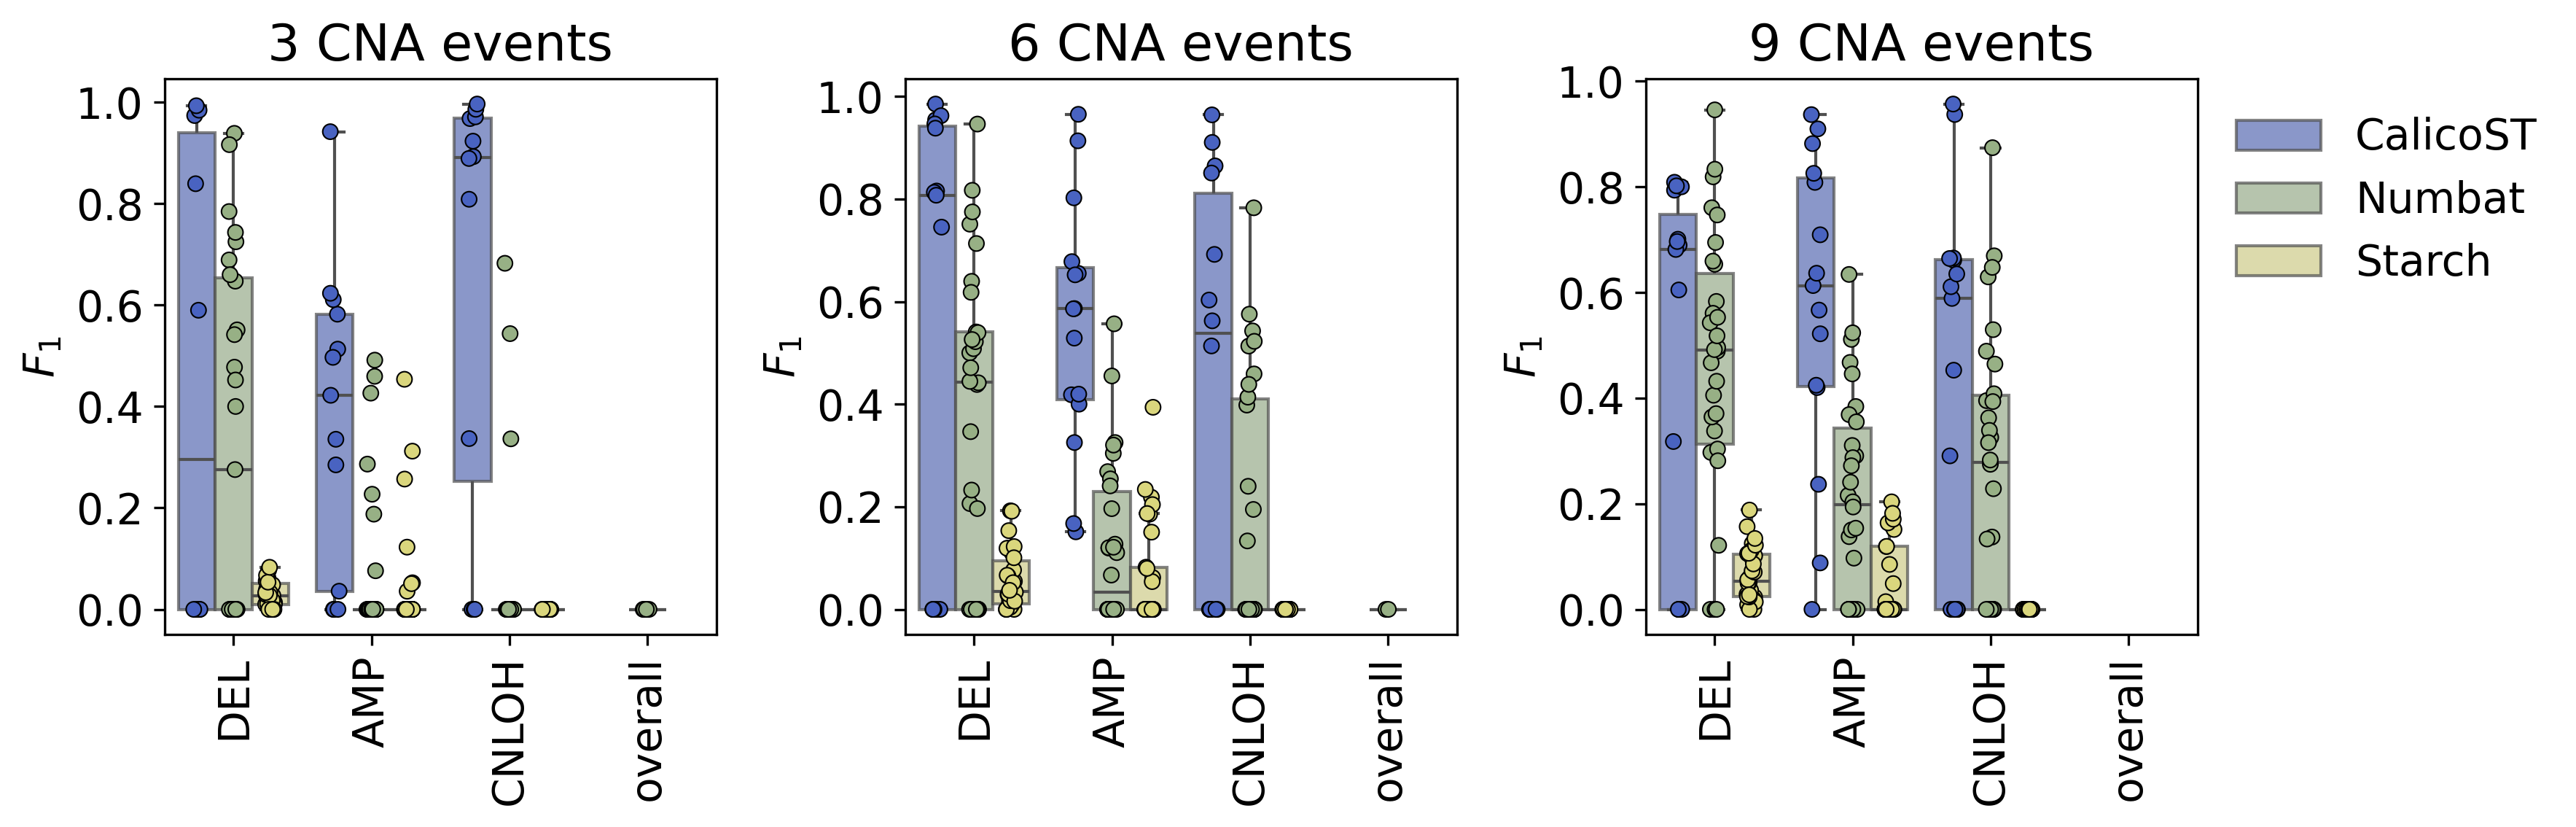

In [19]:
plot_f1s(f1s)

# Done.